## Import and Initial Data View

## 1. Theoretical Concepts

- Data Processing
The .csv file is loaded using the pandas library.

Python: `pd.read_csv('filename.csv', sep=';')`

- Columns with decimal numbers that use commas (e.g., 446,19) are converted to use dots (446.19) to ensure they are properly recognized as float values in Python.

Python: `df_station['Column'] = df_station['Column'].str.replace(',', '.').astype(float)`

## 2. Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data from the file
df = pd.read_csv('Stations_Data.csv', sep=';')

---

# US15 

**As a Player, I want to perform a statistical analysis of the average annual profit of a user-specified railway station. In order to achieve
this, a table with key descriptive measures: mean, standard deviation,
median, and mode will be generated. Additionally, the analysis aims
to identify outlier profits as well as to determine the most and least
profitable years.**

## 1. Theoretical Concepts

### Data Processing
- The .csv file is loaded using the pandas library.
  
  Python: `pd.read_csv('filename.csv', sep=';')`

- Columns with decimal numbers that use commas (e.g., 446,19) are converted to use dots (446.19) to ensure they are properly recognized as float values in Python.

  Python: `df_station['Column'] = df_station['Column'].str.replace(',', '.').astype(float)`

### Measures
- **Mean** ($\bar{x}$): The arithmetic average of the data.
  
    $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
 
  Python: `data.mean()`

- **Median**: The middle value when data is ordered.

  - For discrete or ungrouped continuous data.
 
    $\tilde{x} =\begin{cases}\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}, & \text{se } n \text{ é par} \\
    x_{\left(\frac{n+1}{2}\right)}, & \text{se } n \text{ é ímpar}\end{cases}$


  Python: `data.median()` 

- **Mode**: The most frequent value in the dataset.
  
  Python: `data.mode()` 

- **Standard Deviation** ($s$): Indicates how spread out the values are from the mean.
  
 $s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2}$
  
  
  Python: `data.std()` 

### Outliers
- **Outliers** are values that deviate from the median by more than 1.5 times the interquartile range.
- According to the **IQR (Interquartile Range) method**:
  
   IQR = Q3 - Q1
  
   $\text{Outlier} < Q1 - 1.5 \cdot IQR \quad \text{ou} \quad \text{Outlier} > Q3 + 1.5 \cdot IQR$

    
  Python: `Q1 = data.quantile(0.25) / Q3 = data.quantile(0.75) / IQR = Q3 - Q1 / outliers = data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]` 

### Visual Representation
- **Boxplot**: Displays the median, quartiles, and potential outliers visually.

---------------------------------------------------------------------------------------------------------------------------------------------

## 2. Code

In [25]:
# Ask user for station name
station_name = input('Enter the station name: ').strip().lower()

# Normalize station names for comparison
df['Station'] = df['Station'].astype(str).str.strip().str.lower()

# Filter data by station
df_station = df[df['Station'] == station_name]

# Check that the station has been found and display the data
if df_station.empty:
    print(f"Station '{station_name}' not found.")
else:
    print(df_station)  # Displays data from the selected station

    # Create a copy of the filtered data
    df_station = df_station.copy()

    # Replace commas with dots and convert to float
    df_station['Revenues'] = df_station['Revenues'].astype(str).str.replace(',', '.').astype(float)
    df_station['Expenses'] = df_station['Expenses'].astype(str).str.replace(',', '.').astype(float)

    # Remove entries with missing year
    df_station.dropna(subset=['Year'], inplace=True)

    # Group by year and sum revenues and expenses
    yearly = df_station.groupby('Year').agg({
        'Revenues': 'sum',
        'Expenses': 'sum'
    }).reset_index()

    # Calculate annual profit
    yearly['Profit'] = yearly['Revenues'] - yearly['Expenses']

    # Get the profit column
    profits = yearly['Profit']

    # Calculate mean
    mean_profit = profits.mean()

    # Calculate median
    median_profit = profits.median()

    # Calculate mode
    value_counts = profits.value_counts()
    max_count = value_counts.max()

    if max_count > 1:
        modes = value_counts[value_counts == max_count].index
        formatted_modes = ', '.join(f'{m:.2f}' for m in modes)
        mode_output = f'{formatted_modes} (repetido {max_count}x)'
    else:
        mode_output = 'No Mode Found'

    # Calculate standard deviation
    std_profit = profits.std()

    # View Descriptive Statistics Table
    stats_data = {
        'Descriptive Statistics:': ['Mean |', 'Median |', 'Mode |', 'Standard Deviation (std) |'],
        'Value:': [f'{mean_profit:.2f}', f'{median_profit:.2f}', mode_output, f'{std_profit:.2f}']
    }

    stats_df = pd.DataFrame(stats_data)
    print(stats_df.to_string(index=False))

    # Outlier detection using IQR
    Q1 = profits.quantile(0.25)
    Q3 = profits.quantile(0.75)
    IQR = Q3 - Q1

    outliers = yearly[(profits < Q1 - 1.5 * IQR) | (profits > Q3 + 1.5 * IQR)]

    print('\nOutlier Profits Identified:')
    print(outliers if not outliers.empty else 'No outliers found.')

    # Most and least profitable years
    most_profitable_year = yearly.loc[profits.idxmax(), 'Year']
    least_profitable_year = yearly.loc[profits.idxmin(), 'Year']

    print(f'\nMost Profitable Year: {most_profitable_year}')
    print(f'Least Profitable Year: {least_profitable_year}')


Enter the station name:  Stuttgart


       Station  Year  Month  Arrivals     Iron    Coal    Steel  Vegetables  \
0    stuttgart  2015      1       712  1067.20   76.77   416.56        9.24   
5    stuttgart  2015      2       604   298.18   15.18   328.20        4.38   
10   stuttgart  2015      3       743   858.70   20.18    71.95        9.22   
15   stuttgart  2015      4      1130   979.29   10.65   266.85        7.74   
20   stuttgart  2015      5       440  1172.24   36.37   409.47        5.69   
..         ...   ...    ...       ...      ...     ...      ...         ...   
575  stuttgart  2024      8      1295  2128.28   88.88   958.24       85.73   
580  stuttgart  2024      9      1954  3252.45  125.22   721.87      109.47   
585  stuttgart  2024     10      2558  2685.02   79.87  1200.44       70.08   
590  stuttgart  2024     11      1587  3179.15  139.45   736.06       76.01   
595  stuttgart  2024     12      1647  2437.46   97.51  1006.35       48.50   

     Cereals  Wool   Coffee  Cattle  Passengers   M

---------------------------------------------------------------------------------------------------------------------------------------------

## 3. Analysis and Interpretation of Results


### CSV File data

<img src="US15_results/csv_data.png" width="1000"/>

### Frankfurt 

- **Dados da estação**

  
<img src="US15_results/Frankfurt/frankfurt_data.png" width="600"/>

- **Measures**


<img src="US15_results/Frankfurt/frankfurt_measures.png" width="300"/>


- **Outliers**


<img src="US15_results/Frankfurt/frankfurt_outliers.png" width="600"/>


- **Most and Least Profitable Years**


<img src="US15_results/Frankfurt/profit_years.png" width="250"/>



- **Interpretation of Results**

>The analysis of financial data from Frankfurt station reveals marked fluctuations in monthly profits over the years. This variable performance is substantiated through several descriptive statistical measures, offering a deeper insight into the station’s financial trends.
>
>To begin with, it is evident that 2024 was the most profitable year, whereas 2023 recorded the poorest financial performance. This conclusion arises from direct observation of monthly profit values and the identification of significant outliers associated with these extremes.
>
>Regarding **descriptive statistical measures**, the **mean** profit stood at *55.72*, while the **median** was *36.45*. The difference between these values suggests a **positively skewed distribution or skewed to the right**, whereby a few exceptionally high profit figures raise the mean above the central tendency of the data. **No mode was identified**, indicating that there is no single profit value that occurs more frequently than others.
>
>Profit variability is further underlined by a **standard deviation** of *391.33*, a notably high figure that reflects a substantial spread of profit values around the mean. This reinforces the notion of monthly financial instability, with no consistent performance pattern over time.
>
>With regard to **outliers**, two noteworthy values were detected:
>
> - The first is a significant loss in July 2023, amounting to -1514.76, classifying it as a negative outlier. This aligns with 2023 being the least profitable year.
>
> - The second is a substantial profit recorded in June 2024, totalling 1360.09, which constitutes a positive outlier. This supports the designation of 2024 as the most profitable year.
>
> In summary, the application of descriptive statistical techniques — such as descriptive statistical measures and found outliers — has made it possible to rigorously characterise the evolution of profit at Frankfurt station. 

---------------------------------------------------------------------------------------------------------------------------------------------

# US16

**As a Player, I want to perform a comparative analysis of passenger arrivals across all stations. To achieve this, a boxplot will be
created for each station, displaying the number of arriving passengers
using all recorded data. This visualization will facilitate the identification of trends, variations, and anomalies in passenger traffic across
different stations.**

## 1. Theoretical Concepts

### Formulas

- **Median**: The middle value when data is ordered.

  - For discrete or ungrouped continuous data:


  $\tilde{x} =\begin{cases}\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}, & \text{if } n \text{ is even} \\
    x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd}\end{cases}$

  - Python: `sns.boxplot`

### Outliers
- **Outliers** are values that deviate from the median by more than 1.5 times the interquartile range.
- According to the **IQR (Interquartile Range) method**:
  
   IQR = Q3 - Q1
  
   $\text{Outlier} < Q1 - 1.5 \cdot IQR \quad \text{ou} \quad \text{Outlier} > Q3 + 1.5 \cdot IQR$

    
  Python: `Q1 = data.quantile(0.25) / Q3 = data.quantile(0.75) / IQR = Q3 - Q1 / outliers = data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]` 

### Visual Representation
- **Boxplot**: Displays the median, quartiles, and potential outliers visually.


---------------------------------------------------------------------------------------------------------------------------------------------

## 2. Code

           count           mean            std     min        25%       50%  \
Station                                                                       
berlin     120.0  453342.850000  368290.070919   438.0  127239.00  356093.0   
frankfurt  120.0  448531.425000  349761.362496   586.0  199295.50  391219.5   
hamburg    120.0  619691.583333  536111.342214  2210.0  197310.25  560178.5   
hannover   120.0  344955.508333  262605.428109    12.0  149785.75  309050.0   
stuttgart  120.0  569075.241667  452219.370265   610.0  200569.25  511673.0   

                 75%        max  
Station                          
berlin     717056.00  1312378.0  
frankfurt  610453.00  1538015.0  
hamburg    857452.00  2559534.0  
hannover   471697.75  1183180.0  
stuttgart  763769.75  1871333.0  


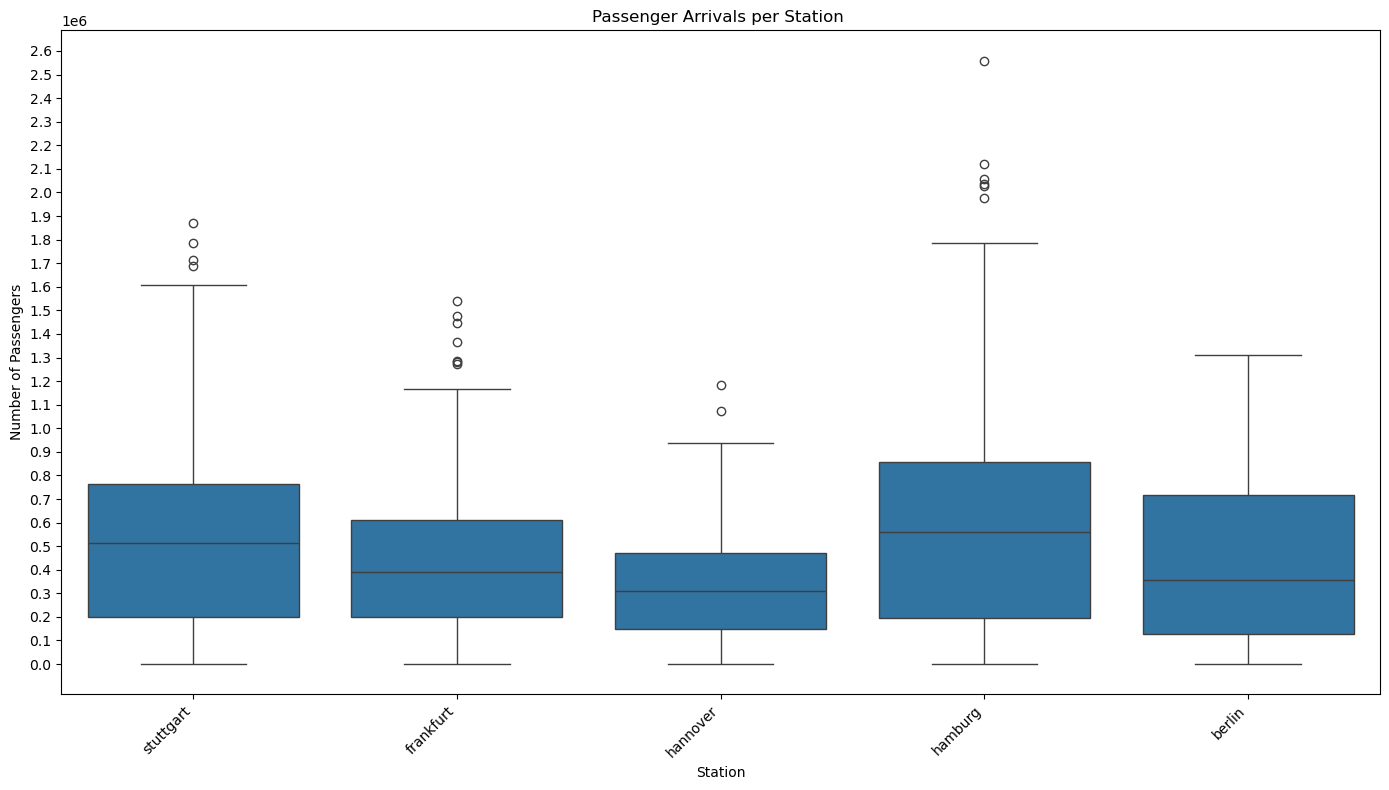

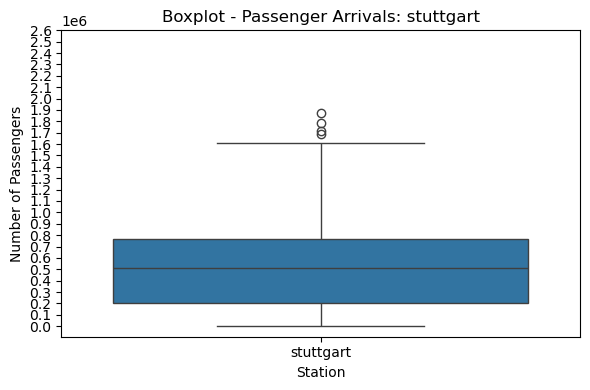

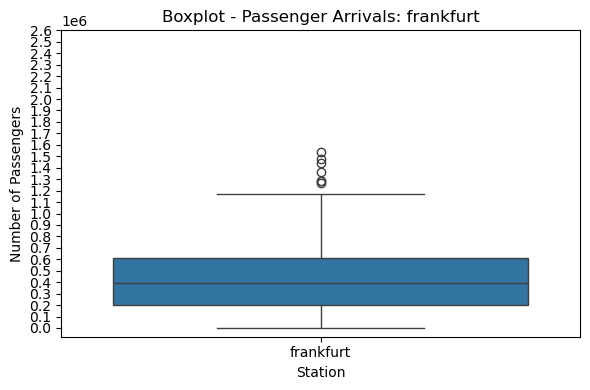

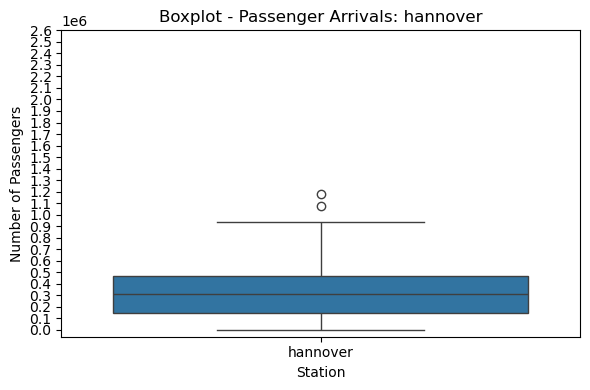

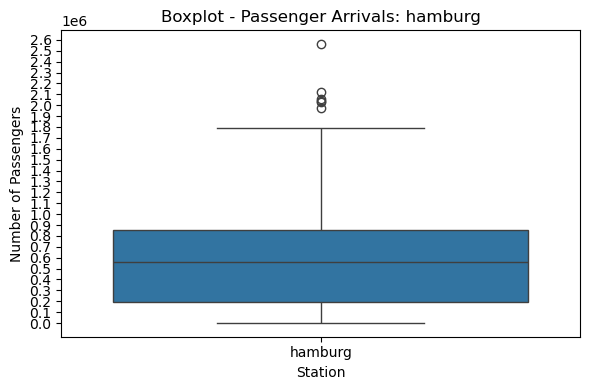

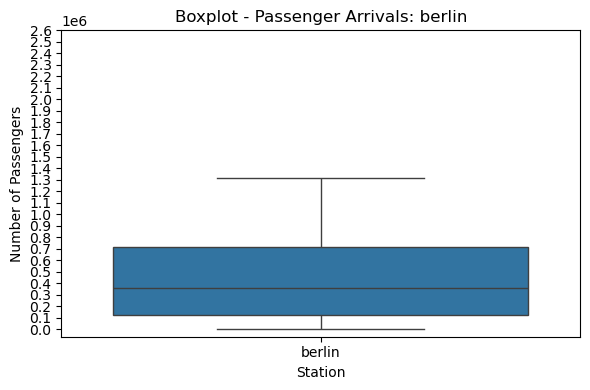

In [23]:
# Define column names
column_station = 'Station'
column_passengers = 'Passengers'

# Clean the data
df_clean = df.dropna(subset=[column_station, column_passengers])
df_clean[column_passengers] = pd.to_numeric(df_clean[column_passengers], errors='coerce')
df_clean = df_clean.dropna(subset=[column_passengers])

# 5. Descriptive statistics
stats = df_clean.groupby(column_station)[column_passengers].describe()
print(stats)

# Prepare data for visualization (without rounding)
df_visual = df_clean.copy()

# General boxplot (all stations)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_visual, x=column_station, y=column_passengers)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, df_visual[column_passengers].max() + 100000, 100000))
plt.title('Passenger Arrivals per Station ')
plt.xlabel('Station')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

# Individual boxplots per station
stations = df_visual[column_station].unique()
for station in stations:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_visual[df_visual[column_station] == station],
                x=column_station, y=column_passengers)
    plt.yticks(np.arange(0, df_visual[column_passengers].max() + 100000, 100000))
    plt.title(f"Boxplot - Passenger Arrivals: {station}")
    plt.xlabel("Station")
    plt.ylabel("Number of Passengers")
    plt.tight_layout()
    plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------

## 3. Analysis and Interpretation of Results

- **Interpretation of Results**

>**1. Passenger flow**
>
> Hamburg has the highest average number of passengers (619,692) and the highest maximum (2,559,534), indicating its importance as a major transport hub with significant passenger flow, while Hannover, with the lowest average (344,956), appears to play a smaller role in the overall transit network compared to the other stations.
>    
>**2. Variability and consistency in passenger counts**
>
>The standard deviation indicates the dispersion of passenger arrivals, with higher values reflecting greater fluctuations; Hamburg, with the highest standard deviation (536,111), experiences the most pronounced variation in passenger traffic, suggesting frequent peaks and troughs, whereas Hannover, with a lower standard deviation (262,605), demonstrates a more stable and consistent passenger flow.
>
>**3. Distribution of passenger arrivals**
>
>The minimum values for all stations are extremely low, indicating that there are occasional instances with very few passenger arrivals. In contrast, the 75th percentile (Q3) is relatively high, showing that most stations frequently handle large volumes of passengers. For instance, in Frankfurt, 75% of observations fall below 610,453 passengers, while in Hamburg, 75% are below 857,452, yet the maximum reaches 2,559,534, suggesting the presence of potential outliers or special events that cause significant spikes in passenger numbers.
>
>**4. Possible outliers and asymmetry**
>
>The difference between the median (50th percentile) and the mean indicates the presence of asymmetry in the data; in Hamburg, the mean (619,692) is significantly higher than the median (560,178), suggesting a right-skewed distribution where occasional high passenger counts raise the average. In contrast, Hannover shows a more balanced distribution, with a mean of 344,956 close to the median of 309,050, indicating fewer extreme variations in passenger numbers.

---------------------------------------------------------------------------------------------------------------------------------------------

# US17

**As a Player, I want to perform an analysis of the cargo arriving
at each station using all recorded data. Given the station’s name and
cargo type specified by the user, a histogram will be created to visually
represent the distribution of analyzed information, providing insights
into cargo patterns.**

## 1. Theoretical Concepts

**Histogram**
>"A graphical representation of data in which classes are marked on the
horizontal axis, frequencies on the vertical axis, and bars with an area
proportional to the frequency of the corresponding class are used.
Contiguous bars have a common border." -  *BRÁS, Helena. Matemática Computacional – Capítulo 2. ISEP, 2024. p. 16.*

> Python: `plt.hist(df_station[chosen_cargo], bins='auto')`

---------------------------------------------------------------------------------------------------------------------------------------------

## 2. Code

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Stations_Data.csv', sep=';')

cargo_types = ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals',
               'Wool', 'Coffee', 'Cattle', 'Passengers', 'Mail']

for col in cargo_types:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

station_name = input('Enter the station name: ')
df_station = df[df['Station'] == station_name]

if df_station.empty:
    print(f"Station '{station_name}' not found.")
else:
    print(df_station)

print("\nAvailable Cargo Types:\n")
for i, cargo in enumerate(cargo_types):
    print(f"{i+1}. {cargo}")
cargo_number = int(input("\nChoose the cargo type number: ")) - 1
chosen_cargo = cargo_types[cargo_number]

plt.figure(figsize=(10, 6))
plt.hist(df_station[chosen_cargo], bins='auto')
plt.title(f"Distribution of '{chosen_cargo}' at '{station_name}'")
plt.xlabel("Quantity (tons)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

KeyboardInterrupt: Interrupted by user

---------------------------------------------------------------------------------------------------------------------------------------------

## 3. Analysis and Interpretation of Results

### Stuttgart

- **Stuttgart Data**
<img src="US17_results/Stuttgart/data.png" width="500"/>

- **Available Cargo Types**
<img src="US17_results/Stuttgart/cargo_types.png" width="200"/>

- **Histogram - Distribution of Iron at Stuttgart**
<img src="US17_results/Stuttgart/stuttgart_iron.png" width="700"/>

- **Interpretation of Results**

>The histogram presented illustrates the **distribution of iron** quantities transported at the **Stuttgart station**. It is clearly observed that **most shipments are concentrated in the range between 0 and 3000 tonnes**, with particular emphasis on the 1000 to 2000 tonnes interval, which shows the highest frequency. This indicates that, predominantly, iron is transported in small to moderate quantities at this station. As the quantity transported increases, there is a gradual decline in frequency, which reveals a **right-skewed distribution**, that is, a positively skewed one. This right skewness occurs because the tail of the distribution extends towards higher values, albeit with lower frequency, while the lower values account for the majority of the observations. This means that there are a few records involving very large quantities of iron — such as shipments close to 8000 tonnes — which, although rare, pull the **mean to the right of the graph**, moving it away from the main concentration of data. 
Thus, the data analysed suggest that the Stuttgart station’s operations are likely better suited to handling volumes below 3000 tonnes.

---

# US18

**As a Player, I want to perform the analysis of train distribution,
passengers, and mail across different stations. Using all recorded data,
this distribution will be visually represented through three pie charts,
providing a clear and comprehensive overview of how these elements
are allocated among the stations.**

## 1. Theoretical Concepts

The purpose of this User Story (US18) is to perform a descriptive statistical analysis of the distribution of **train arrivals**, **passengers**, and **mail** volumes across different railway stations. This analysis is visualized using three side-by-side **pie charts**, one for each variable.

Such visual representations provide clear insights into the operational distribution of resources and traffic in the railway system, which can be critical for planning, decision-making, and simulation accuracy in the Project Integrator (PI).

### 1.1 Pie Chart Fundamentals

A pie chart is a graphical representation that divides a circle into sectors, where each sector's area (and corresponding central angle) is proportional to the **relative frequency** of the category it represents. It is particularly suitable for **qualitative data** or **discrete quantitative data** grouped into categories.

Given a dataset with $n$ categories and their absolute frequencies $f_1, f_2, \dots, f_n$, the relative frequency for category $i$ is given by:

$$
r_i = \frac{f_i}{\sum_{j=1}^{n} f_j}
$$

The corresponding angle in the pie chart is:

$$
\theta_i = r_i \times 360^\circ
$$

These angles determine the size of each pie sector.

### 1.2 Importance in Statistical Railway Analysis

In the context of railway systems, such charts help identify:
- Stations with the highest and lowest volumes of traffic
- Operational bottlenecks
- Specialization of stations (e.g., passenger hubs vs. mail distribution centers)

These insights directly contribute to enhancing infrastructure allocation, scheduling, service optimization, and economic forecasting within the simulation environment.


---------------------------------------------------------------------------------------------------------------------------------------------

## 2. Code

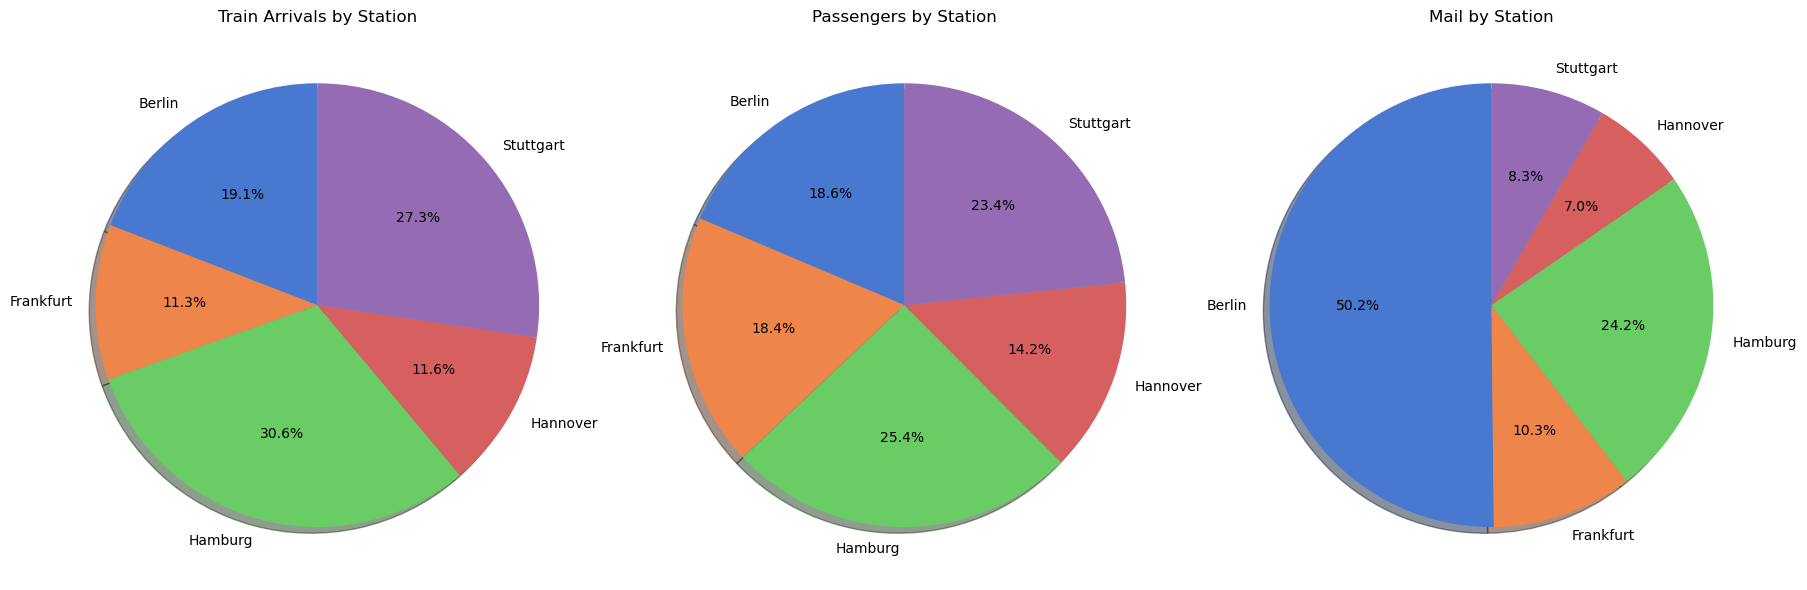

In [21]:
# --------------------------
# Clean the 'Mail' column
# --------------------------
if 'Mail' in df.columns:
    df['Mail'] = df['Mail'].astype(str)
    df['Mail'] = df['Mail'].str.replace('tons', '', case=False)
    df['Mail'] = df['Mail'].str.replace(',', '')
    df['Mail'] = [float(x) if x.replace('.', '', 1).isdigit() else None for x in df['Mail']]

# --------------------------
# Group data by 'Station'
# --------------------------
if 'Station' in df.columns:
    df_grouped = df.groupby('Station').sum()

    # --------------------------
    # Pie chart plotting in subplots
    # --------------------------
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    def plot_pie(ax, column_name, chart_title):
        if column_name in df_grouped.columns:
            values = df_grouped[column_name].values
            labels = df_grouped.index

            ax.pie(values, labels=labels,
                   autopct='%1.1f%%', shadow=True,
                   startangle=90,
                   colors=sns.color_palette('muted'))
            ax.set_title(chart_title)
            ax.axis('equal')
        else:
            ax.set_visible(False)
            print(f"Column '{column_name}' not found, skipping pie chart.")

    # Plot all three charts
    plot_pie(axs[0], 'Arrivals', 'Train Arrivals by Station')
    plot_pie(axs[1], 'Passengers', 'Passengers by Station')
    plot_pie(axs[2], 'Mail', 'Mail by Station')

    plt.tight_layout()
    plt.show()

else:
    print("The column 'Station' was not found in the CSV file.")

---------------------------------------------------------------------------------------------------------------------------------------------

## 3. Analysis and Interpretation of Results

### 3.1 Pie Chart 1 - Train Arrivals

<img src="US18_results/US18 - Pie Charts - Train Arrivals by Station.png" width="500"/>

The station **Hamburg** represents the largest share of arrivals, approximately $30.6\%$, followed closely by **Stuttgart** with $27.3\%$.

**Frankfurt** and **Hannover** contribute significantly less, indicating lower train traffic.

### 3.2 Pie Chart 2 - Passengers

<img src="US18_results/US18 - Pie Charts - Passengers by Station.png" width="500"/>

Again, **Hamburg** leads in passenger traffic with around $25.4\%$, while **Stuttgart** has $23.4\%$.

**Berlin** and **Frankfurt** share mid-range values, and **Hannover** appears to receive fewer passengers.

### 3.3 Pie Chart 3 - Mail

<img src="US18_results/US18 - Pie Charts - Mail by Station.png" width="500"/>

In contrast to the first two, **Berlin** dominates the mail volume with over $50.2\%$, suggesting it might serve as a central distribution hub.

**Hamburg** also contributes significantly with $24.2\%$.

Other stations play minor roles in this context.

### 3.4 Synthesis and PI Contextualization

From an operational standpoint, the distinct distribution patterns reveal important management insights:

- Stations like **Hamburg** require more resources and scheduling capacity for both passenger and train services.
- **Berlin's** specialization in mail could suggest focused logistic infrastructure investment.

These insights can inform:

- Infrastructure scaling  
- Simulation parameter tuning  
- Economic forecasts for revenue models in the PI  

The use of pie charts thus contributes to a **data-driven strategic model** within the simulation platform.


---------------------------------------------------------------------------------------------------------------------------------------------

## 4. Contribution of each team member

| Student Number    | Name             | Contribution (%) |
|-------------------|------------------|-------------------
|  1241412          | André Pinho      |  25%             |
|  1241330          | Carlota Lemos    |  25%             |
|  1241418          | Eduardo Almeida  |  25%             |
|  1241452          | Mara Santos      |  25%             |

**Total**: 100%